In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import os

rcParams['font.family'] = 'sans-serif'

In [14]:
def plot_arrays_from_files(file_path1, file_path2, file_path3):
    """
    Plots arrays from three files side by side, using Arial font and adding units to the titles.

    Parameters:
    - file_path1: Path to the topography .npy file.
    - file_path2: Path to the velocity .npy file.
    - file_path3: Path to the thickness .npy file.
    """
    # Extract model_id and state_id from file paths
    model_id = file_path2.split('/')[6]  # Adjust index based on your path structure
    state_id = file_path2.split('_')[-1].split('.')[0]

    # Load the arrays
    topography = np.load(file_path1)
    velocity = np.load(file_path2)
    thickness = np.load(file_path3)

    # Check if the arrays have the expected shape
    if topography.shape == (256, 256) and velocity.shape == (256, 256) and thickness.shape == (256, 256):
        # Create a figure with 3 subplots side by side
        fig, axs = plt.subplots(1, 3, figsize=(15, 5))
        fig.suptitle(f'Model ID: {model_id}, State ID: {state_id}', fontsize=16)

        # Plot the topography array
        img0 = axs[0].imshow(topography, cmap='gray', extent=[0, 256, 0, 256])
        axs[0].set_title('Topography (m)')
        fig.colorbar(img0, ax=axs[0], orientation='vertical')
        axs[0].set_xlabel('Pixels')
        axs[0].set_ylabel('Pixels')

        # Plot the velocity array
        img1 = axs[1].imshow(velocity, cmap='jet', vmin=0, vmax=30, extent=[0, 256, 0, 256])
        axs[1].set_title('Velocity (m/s)')
        fig.colorbar(img1, ax=axs[1], orientation='vertical')
        axs[1].set_xlabel('Pixels')
        axs[1].set_ylabel('Pixels')

        # Plot the thickness array
        img2 = axs[2].imshow(thickness, cmap='jet', vmin=0, vmax=5, extent=[0, 256, 0, 256])
        axs[2].set_title('Thickness (m)')
        fig.colorbar(img2, ax=axs[2], orientation='vertical')
        axs[2].set_xlabel('Pixels')
        axs[2].set_ylabel('Pixels')

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make room for the overall title
        plt.show()
    else:
        print("One or more arrays do not have the expected shape (256x256).")

30


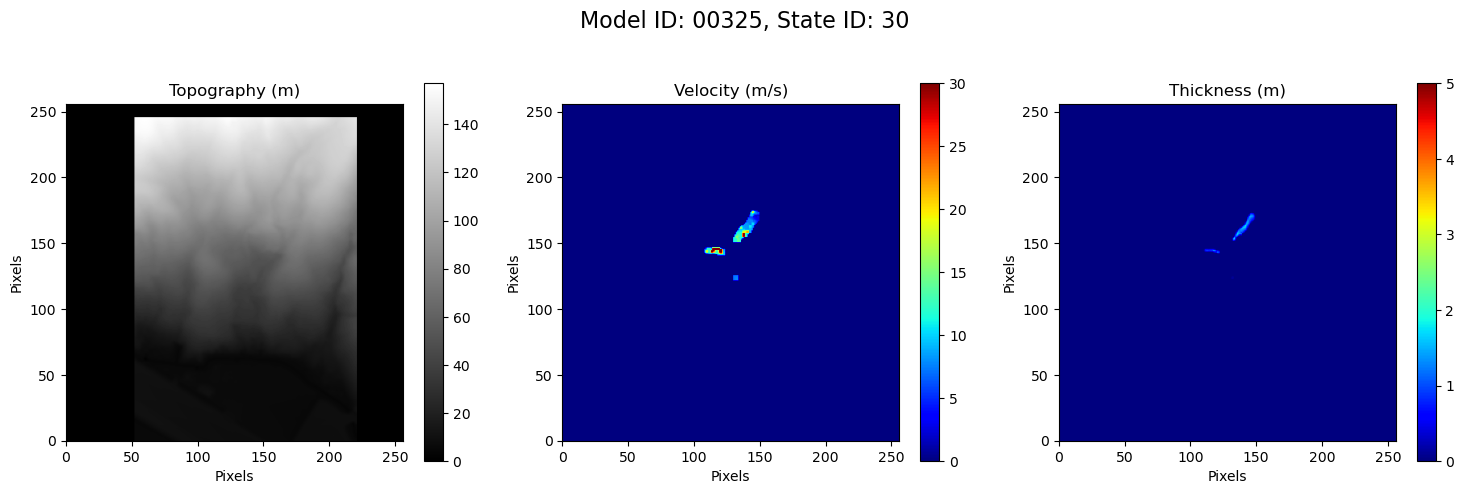

31


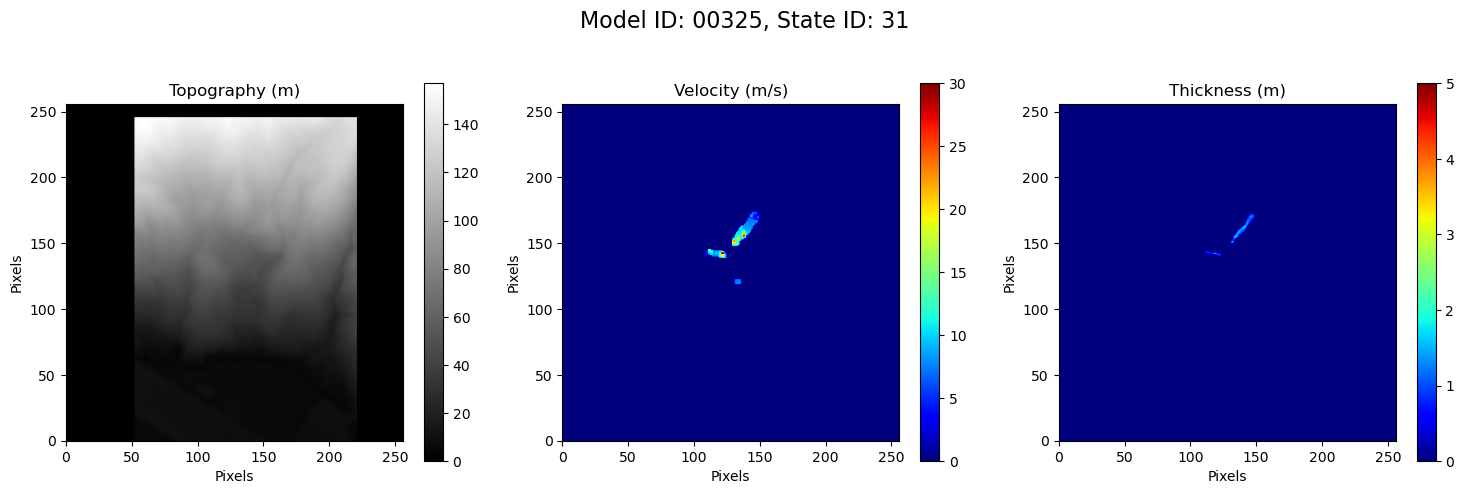

32


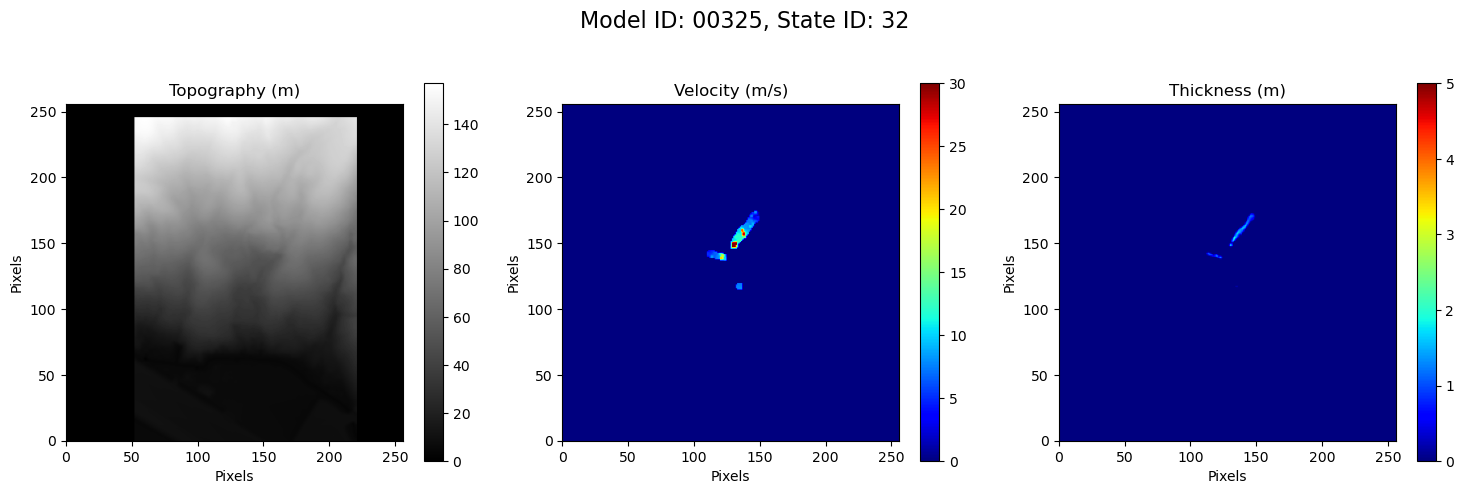

33


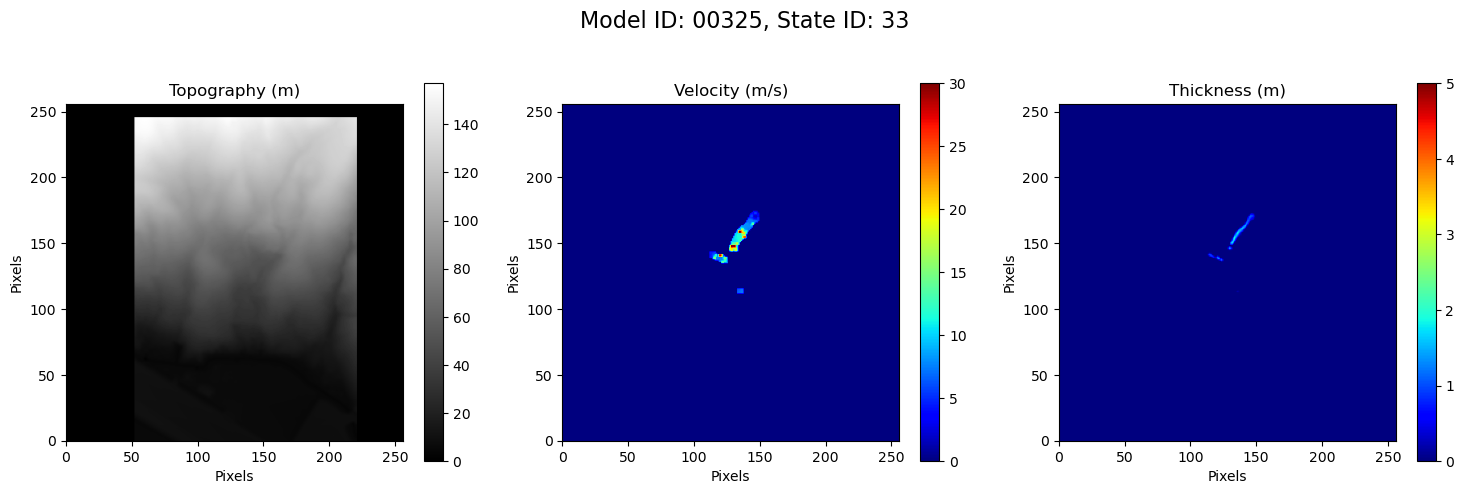

34


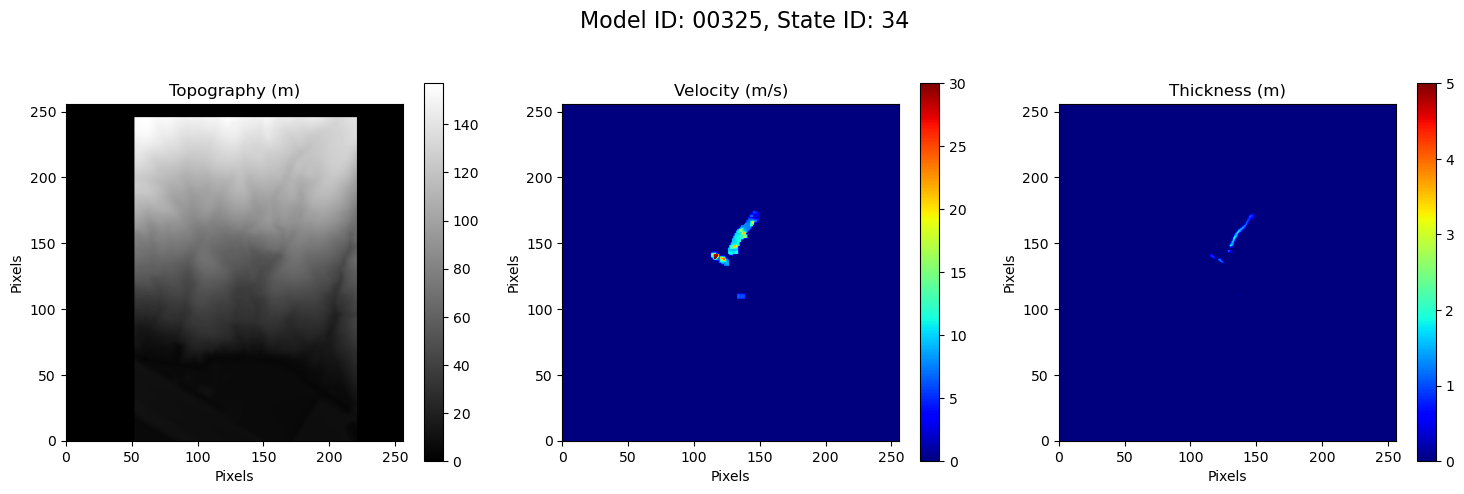

In [15]:
model_id = '00325'
state_ids= ['30', '31', '32', '33', '34']

for id in state_ids:
    print(id)
    master_folder = fr'/home/tom/repos/dyna-landslide-surrogate/data/{model_id}/04_FinalProcessedData_256'
    subfolder1 = fr'{master_folder}/thickness'
    subfolder2 = fr'{master_folder}/velocity'
    subfolder3 = fr'{master_folder}/elevation'
    filepath_topo = fr'{subfolder3}/{model_id}_elevation.npy' 
    filepath_vel = fr'{subfolder2}/{model_id}_velocity_{id}.npy'  
    filepath_thick = fr'{subfolder1}/{model_id}_thickness_{id}.npy'  

    plot_arrays_from_files(filepath_topo, filepath_vel, filepath_thick)